In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = "data/imagenet_superclass/"
memnet_score_dir = data_dir+"memnet_scores/"
score_dir = data_dir+"scores/"

In [3]:
lamem_scores = np.load("data/lamem_memorability_split_1.npy")
memnet_scores = np.array([np.random.choice(np.load(memnet_score_dir+f"{i}-imagenet256_memorability_memnet.npy"), 10000, replace=False) for i in range(11)]).ravel()
scores = np.array([np.random.choice(np.load(score_dir+f"{i}-imagenet256_memorability.npy"), 10000, replace=False) for i in range(11)]).ravel()

print(f"lamem_scores.shape: {lamem_scores.shape}")
print(f"memnet_scores.shape: {memnet_scores.shape}")
print(f"scores.shape: {scores.shape}")

lamem_scores.shape: (58741,)
memnet_scores.shape: (110000,)
scores.shape: (110000,)


In [4]:
def linear_shift(x):
    y = (x - np.mean(scores)) * (np.std(lamem_scores) / np.std(scores)) + np.mean(lamem_scores)
    if y > 1:
        return 1
    elif y < 0:
        return 0
    else:
        return y

In [5]:
scores_shifted = np.array([linear_shift(s) for s in scores])

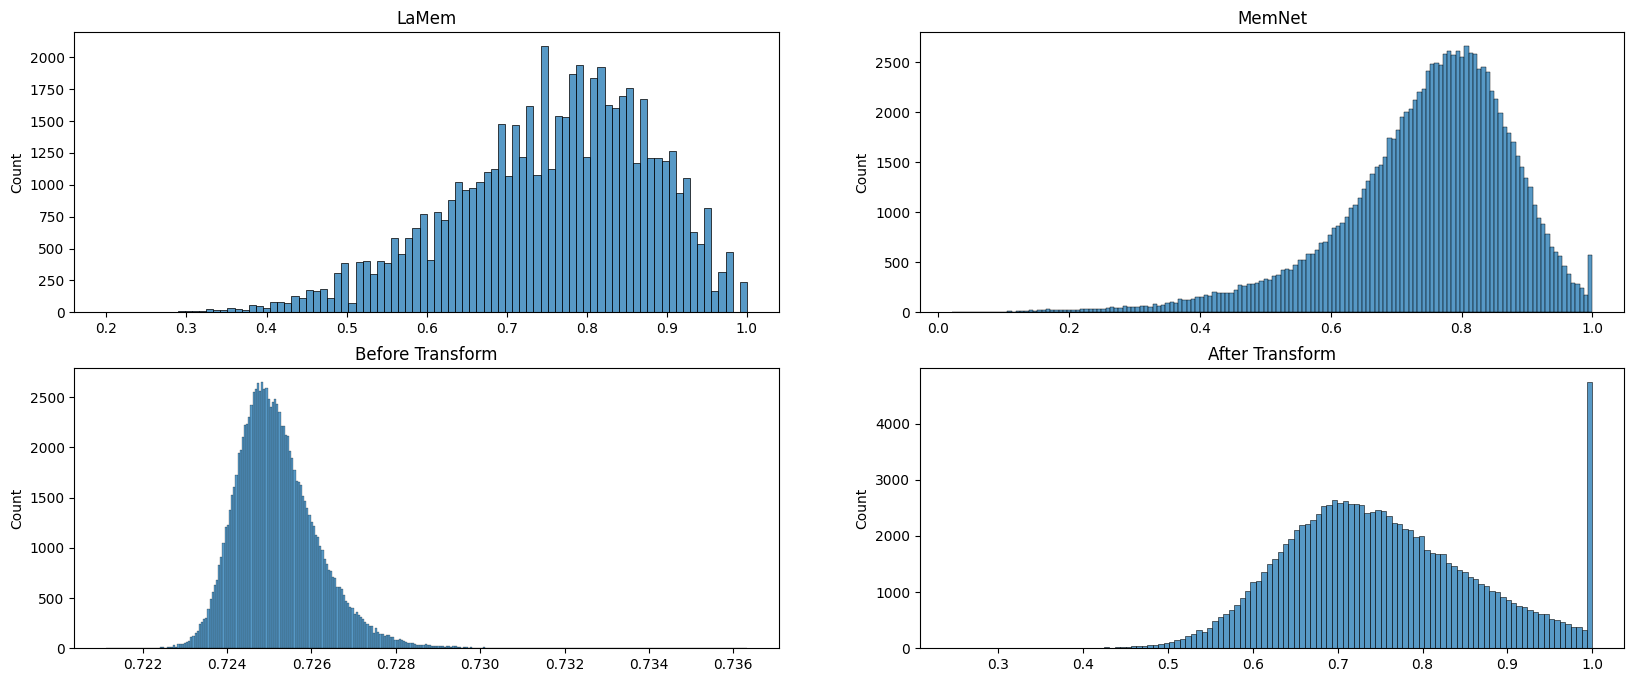

In [6]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(2, 2, 1)
sns.histplot(lamem_scores, ax=ax1)
ax1.title.set_text("LaMem")

ax2 = fig.add_subplot(2, 2, 2)
sns.histplot(memnet_scores, ax=ax2)
ax2.title.set_text("MemNet")

ax3 = fig.add_subplot(2, 2, 3)
sns.histplot(scores, ax=ax3)
ax3.title.set_text("Before Transform")

ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(scores_shifted, ax=ax4)
ax4.title.set_text("After Transform")

plt.show()